# Preprocessing of handwritten larger numbers
Source: my notebook:)

In [1]:
%cd /opt/notebooks/basic_of_ml_image_classification

[WinError 3] System nie może odnaleźć określonej ścieżki: '/opt/notebooks/basic_of_ml_image_classification'
C:\Users\piecz\PycharmProjects\basic_of_ml_image_classification


In [1]:
%cd basic_of_ml_image_classification

[WinError 2] Nie można odnaleźć określonego pliku: 'basic_of_ml_image_classification'
C:\Users\piecz\PycharmProjects\basic_of_ml_image_classification


In [15]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   - -------------------------------------- 1.3/39.0 MB 7.4 MB/s eta 0:00:06
   -- ------------------------------------- 2.6/39.0 MB 7.2 MB/s eta 0:00:06
   ---- ----------------------------------- 4.2/39.0 MB 7.2 MB/s eta 0:00:05
   ----- ---------------------------------- 5.8/39.0 MB 7.3 MB/s eta 0:00:05
   ------ --------------------------------- 6.8/39.0 MB 7.0 MB/s eta 0:00:05
   -------- ------------------------------- 8.1/39.0 MB 6.8 MB/s eta 0:00:05
   --------- ------------------------------ 9.4/39.0 MB 6.8 MB/s eta 0:00:05
   ----------- ---------------------------- 11.0/39.0 MB 6.8 MB/s eta 0:00:05
   ------------ --------------------------- 12.3/39.0 MB 6.8 MB/s eta 0:00:04
   -------------- ------------------------- 14.2/39.0 MB 6.9 MB/s eta 0:00:04
   ---------------- ----------------------- 15.7/39.0 MB 7.0 MB/s eta 0:00:04
   ----------------- ---------------------- 17.3/39.0 MB 7.1 MB/s eta 0:00:04
 

  You can safely remove it manually.
  You can safely remove it manually.


In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np


In [2]:
IMAGE_DIR = "data//images"

image_paths = [
    os.path.join(IMAGE_DIR, fname)
    for fname in os.listdir(IMAGE_DIR)
    if fname.lower().endswith(".png")
]

print(f"{len(image_paths)} images was founded")

39 images was founded


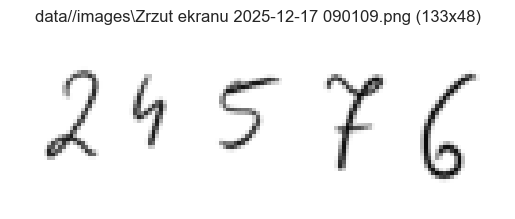

Original size: 399 x 144
Resized size:  133 x 48


In [5]:
img = Image.open(image_paths[1])

width, height = img.size

new_height = 24*2
scale = new_height / height
new_width = int(width * scale)

img_resized = img.resize((new_width, new_height), Image.BILINEAR)

plt.imshow(img_resized)
plt.axis("off")
plt.title(f"{image_paths[0]} ({new_width}x{new_height})")
plt.show()

print(f"Original size: {width} x {height}")
print(f"Resized size:  {new_width} x {new_height}")

### Splitting into single digits
1) load resized images and convert to a grey scale

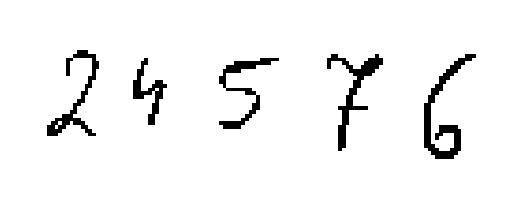

In [6]:
img_grey = np.array(img_resized.convert('L')) 

# Apply Otsu's thresholding
_, binary = cv2.threshold(img_grey, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the result
plt.imshow(binary, cmap="gray")
plt.axis("off")
plt.show()


2) splitting into singe digits by summing values in columns - sum in columns witch are space between digits will be 0 

In [8]:
binary_inv = 255 - binary
projection = np.sum(binary_inv, axis=0)

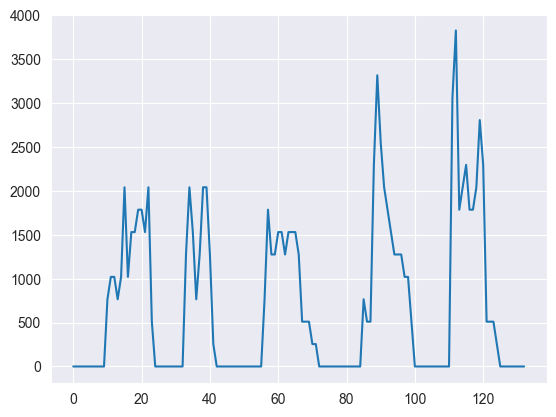

In [9]:
plt.plot(projection)

In [10]:
segments = []
in_char = False
start = 0

for i, val in enumerate(projection):
    if val > 0 and not in_char:
        start = i
        in_char = True
    elif val == 0 and in_char:
        segments.append((start, i))
        in_char = False

if in_char:
    segments.append((start, len(projection)))

In [11]:
digits = []

for x1, x2 in segments:
    digit = binary[:, x1:x2]

    rows = np.where(np.sum(digit, axis=1) > 0)[0]
    if len(rows) == 0:
        continue

    y1, y2 = rows[0], rows[-1]
    digit = digit[y1:y2+1, :]

    digits.append(digit)


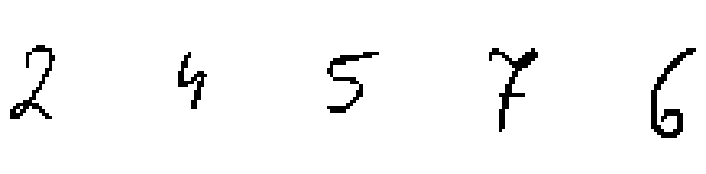

detected number of digits: 5


In [12]:
plt.figure(figsize=(10, 2))
for i, d in enumerate(digits):
    plt.subplot(1, len(digits), i + 1)
    plt.imshow(d, cmap="gray")
    plt.axis("off")

plt.show()
print(f"detected number of digits: {len(digits)}")

### Perform and evaluate workflow on the available examples

In [96]:
import functions.preprocess_my_numbers as my_pr
import importlib
importlib.reload(my_pr)

<module 'functions.preprocess_my_numbers' from 'C:\\Users\\piecz\\PycharmProjects\\basic_of_ml_image_classification\\functions\\preprocess_my_numbers.py'>

In [ ]:
for p in image_paths:
    img = Image.open(p)
    img = my_pr.resize(img)
    digits = my_pr.split_to_digits(img)    
    digits = my_pr.prepare_digits_for_mnist(digits)
    
    print(f"detected number of digits: {len(digits)}")
    
    plt.figure(figsize=(5, 1))
    for i, d in enumerate(digits):
        plt.subplot(1, len(digits), i + 1)
        plt.imshow(d, cmap="gray")
        plt.axis("off")

    plt.show()

### Digit recognition using model trained at MNIST

In [95]:
import functions.training as my_tr
import torch
importlib.reload(my_tr)

<module 'functions.training' from 'C:\\Users\\piecz\\PycharmProjects\\basic_of_ml_image_classification\\functions\\training.py'>

In [16]:
type = "two-layer"
hidden_size = 32

model_loaded = my_tr.TwoLayerNet(hidden_size=hidden_size)
path = f"data/models/{type}_hidden-size-{hidden_size}_params.pth"
model_loaded.load_state_dict(torch.load(path))
model_loaded.eval()

TwoLayerNet(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=10, bias=True)
)

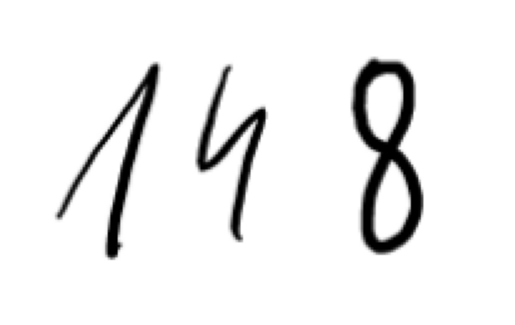

detected number of digits: 3


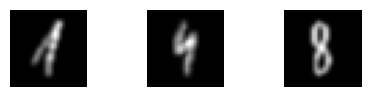

148


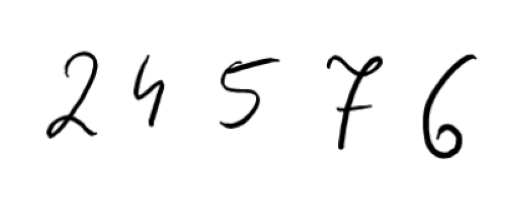

detected number of digits: 5


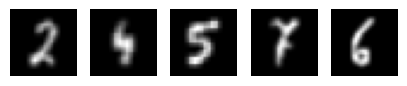

24836


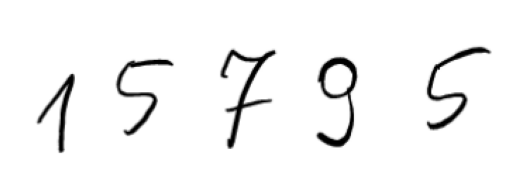

detected number of digits: 5


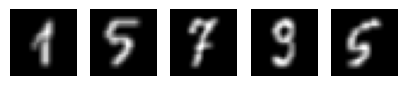

18338


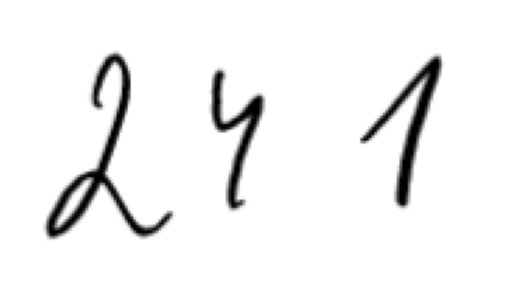

detected number of digits: 3


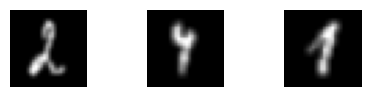

289


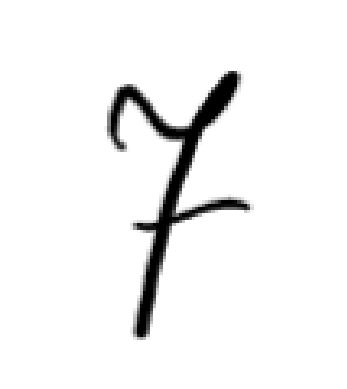

detected number of digits: 1


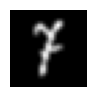

3


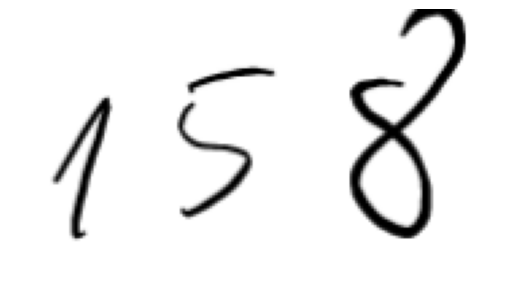

detected number of digits: 3


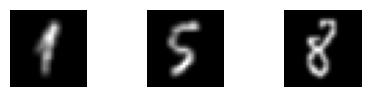

188


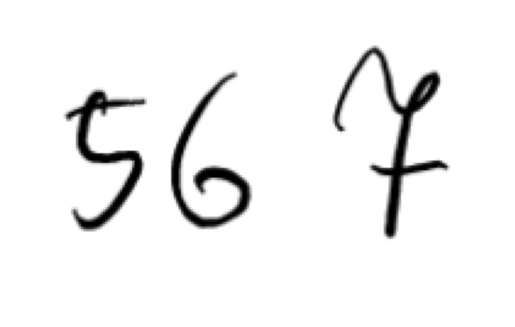

detected number of digits: 3


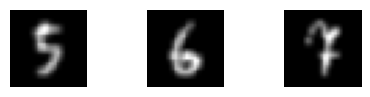

567


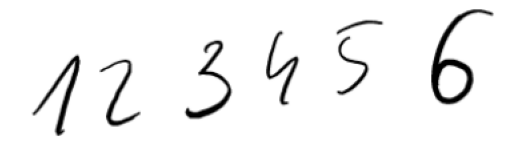

detected number of digits: 6


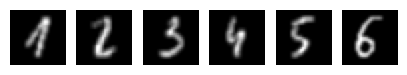

883486


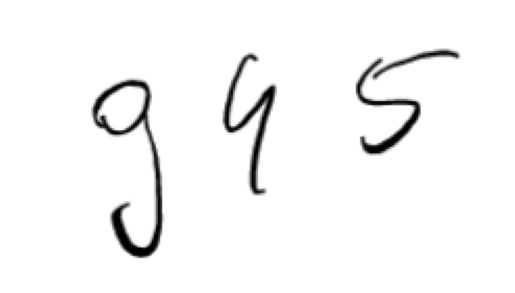

detected number of digits: 3


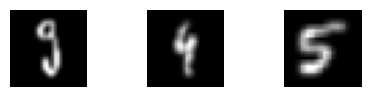

848


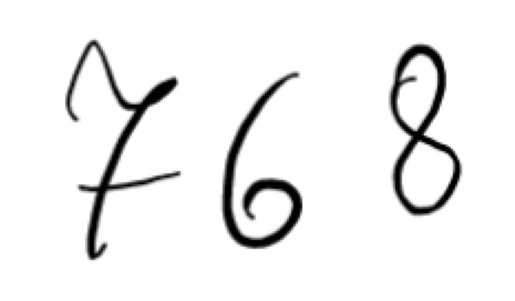

detected number of digits: 3


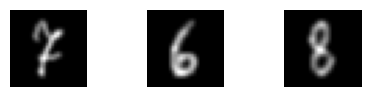

368


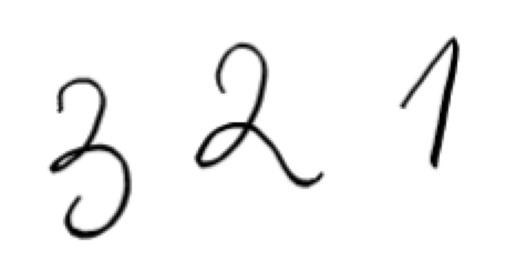

detected number of digits: 3


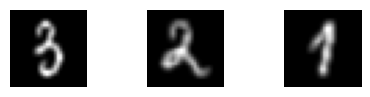

329


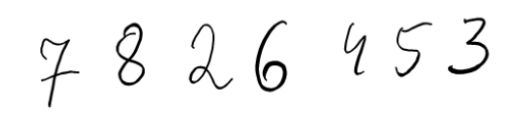

detected number of digits: 7


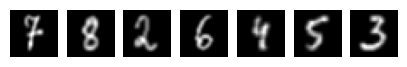

8886483


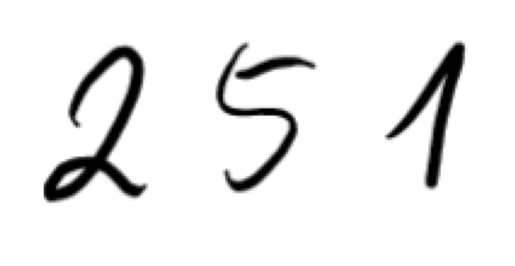

detected number of digits: 3


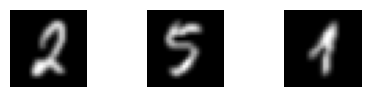

251


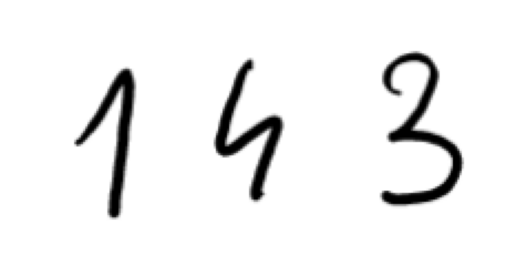

detected number of digits: 3


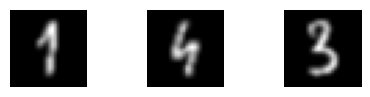

943


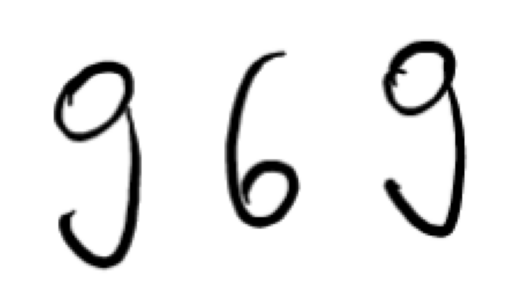

detected number of digits: 3


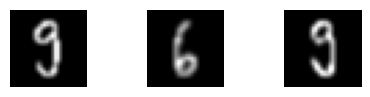

363


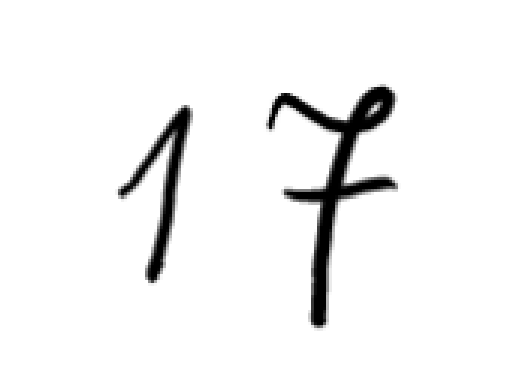

detected number of digits: 2


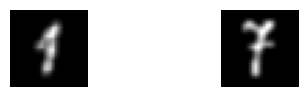

93


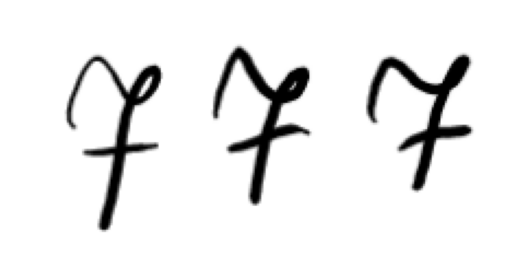

detected number of digits: 3


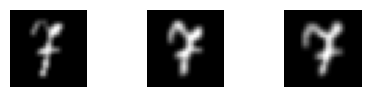

377


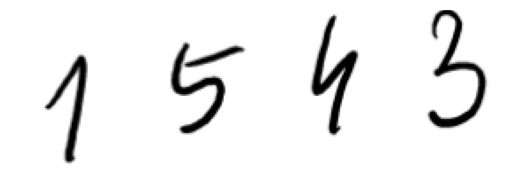

detected number of digits: 4


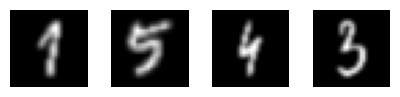

9843


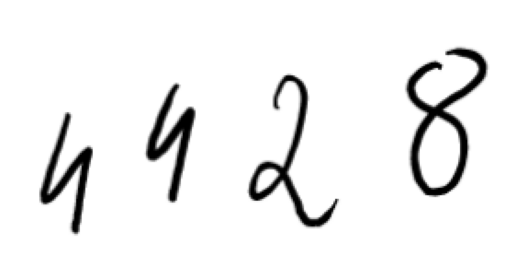

detected number of digits: 4


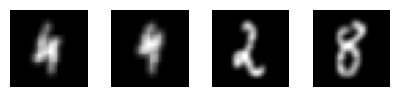

4428


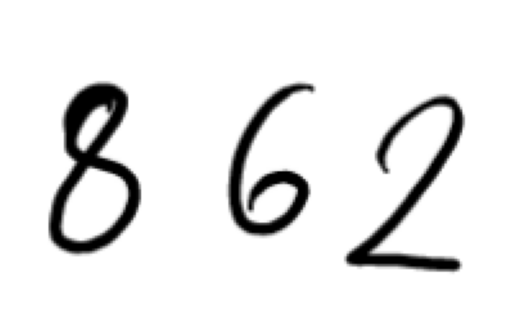

detected number of digits: 3


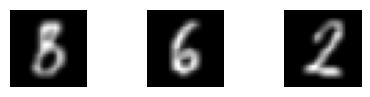

862


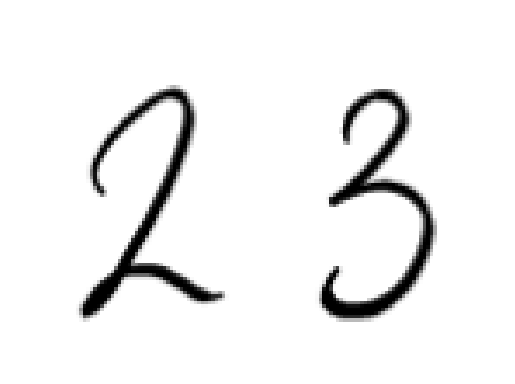

detected number of digits: 2


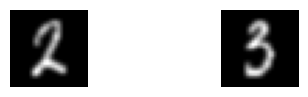

23


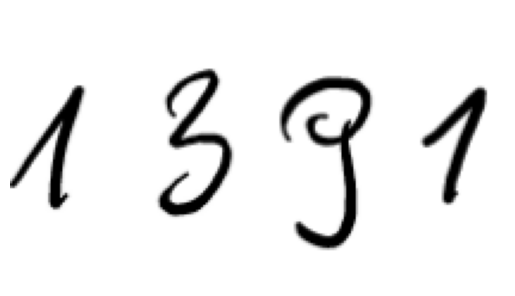

detected number of digits: 4


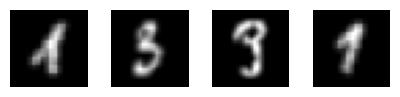

1838


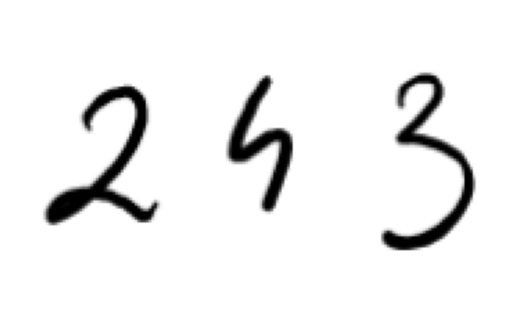

detected number of digits: 3


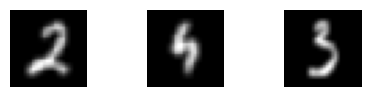

243


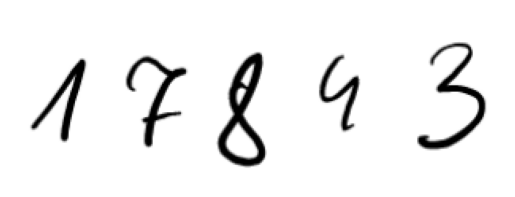

detected number of digits: 5


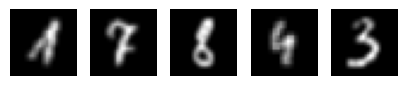

33843


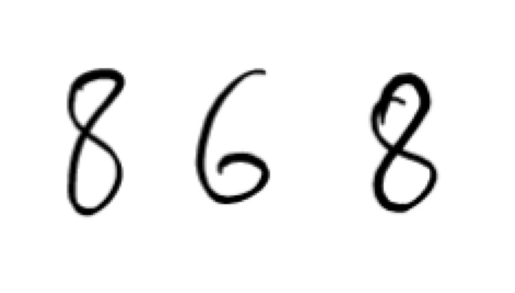

detected number of digits: 3


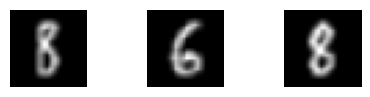

868


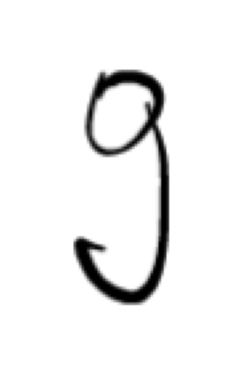

detected number of digits: 1


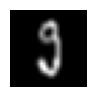

0


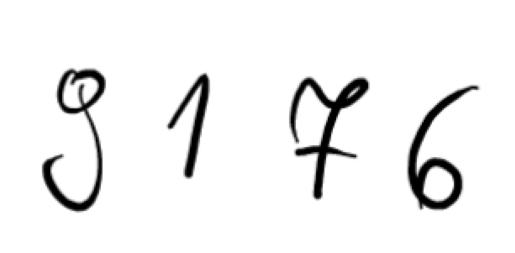

detected number of digits: 4


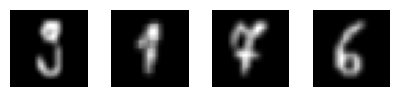

2986


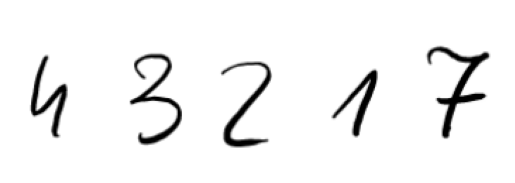

detected number of digits: 5


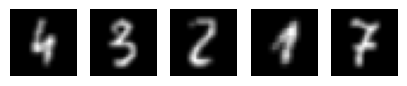

43213


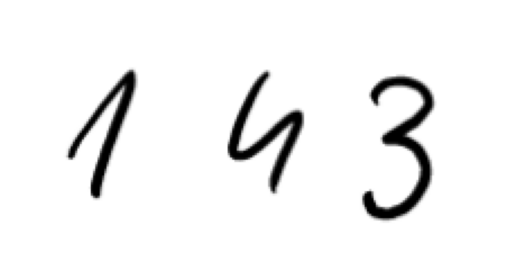

detected number of digits: 3


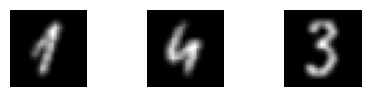

143


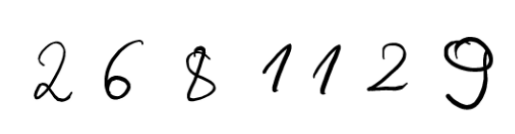

detected number of digits: 8


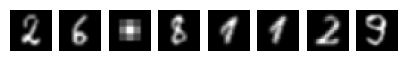

26489823


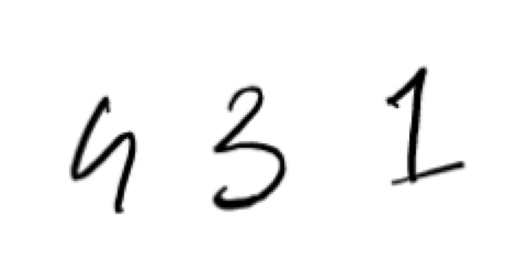

detected number of digits: 3


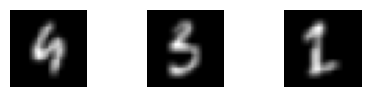

458


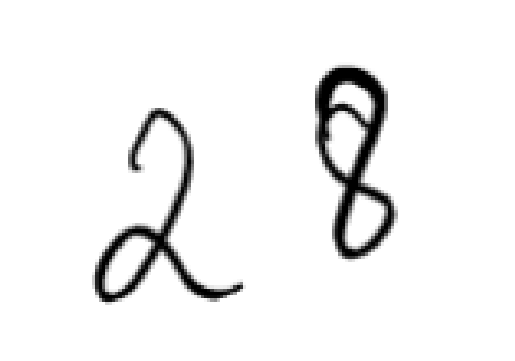

detected number of digits: 2


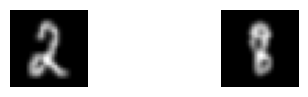

23


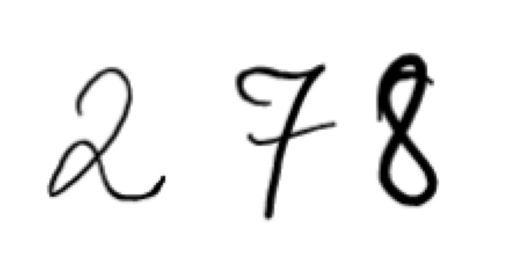

detected number of digits: 3


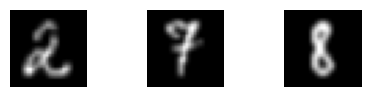

238


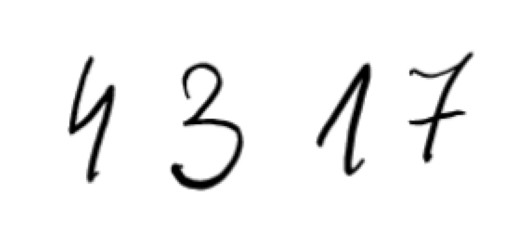

detected number of digits: 4


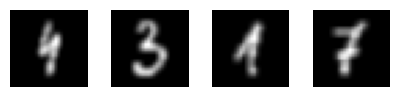

4318


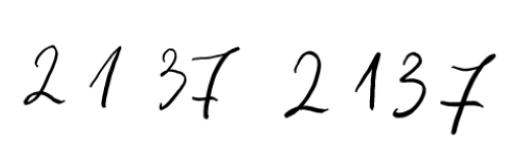

detected number of digits: 8


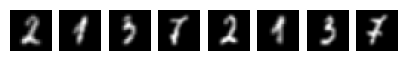

11882338


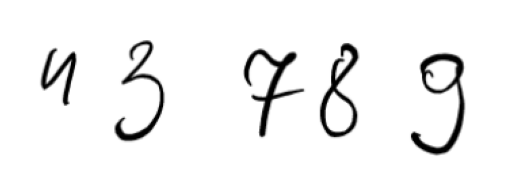

detected number of digits: 5


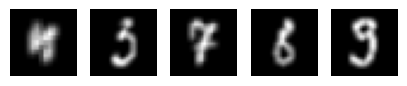

43363


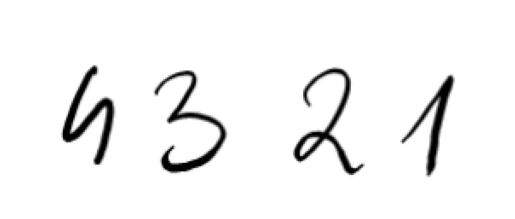

detected number of digits: 4


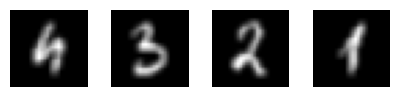

4521


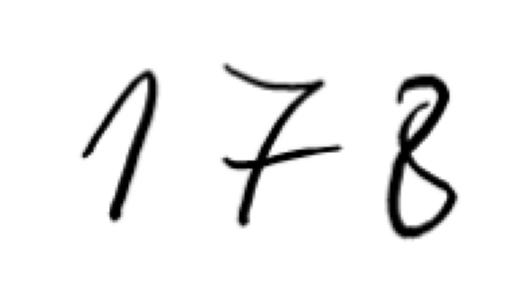

detected number of digits: 3


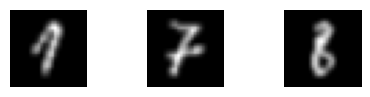

988


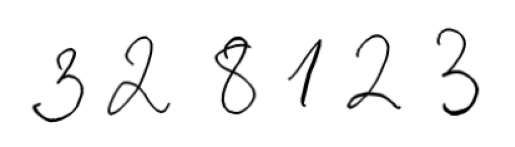

detected number of digits: 6


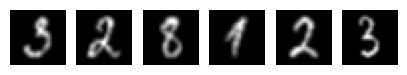

328923


In [111]:
for p in image_paths:
    img = Image.open(p).convert('L')
    plt.imshow(np.array(img), cmap='gray')
    plt.axis('off')
    plt.show()
    
    img_resized = my_pr.resize(img,new_height=28)
    digits = my_pr.split_to_digits(img_resized)    
    digits = my_pr.prepare_digits_for_mnist(digits,blur_ksize=3,n=24,margin=2)
    
    print(f"detected number of digits: {len(digits)}")
    
    plt.figure(figsize=(5, 1))
    for i, d in enumerate(digits):
        plt.subplot(1, len(digits), i + 1)
        plt.imshow(d, cmap="gray")
        plt.axis("off")
    plt.show()
    
    number = []
    
    for d in digits:
        d_tensor = torch.tensor(d).unsqueeze(0)
        output = model_loaded(d_tensor)
        pred = torch.argmax(output, dim=1).item()
        number.append(pred)

    print(''.join(str(n) for n in number))

In [61]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

#load data
train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

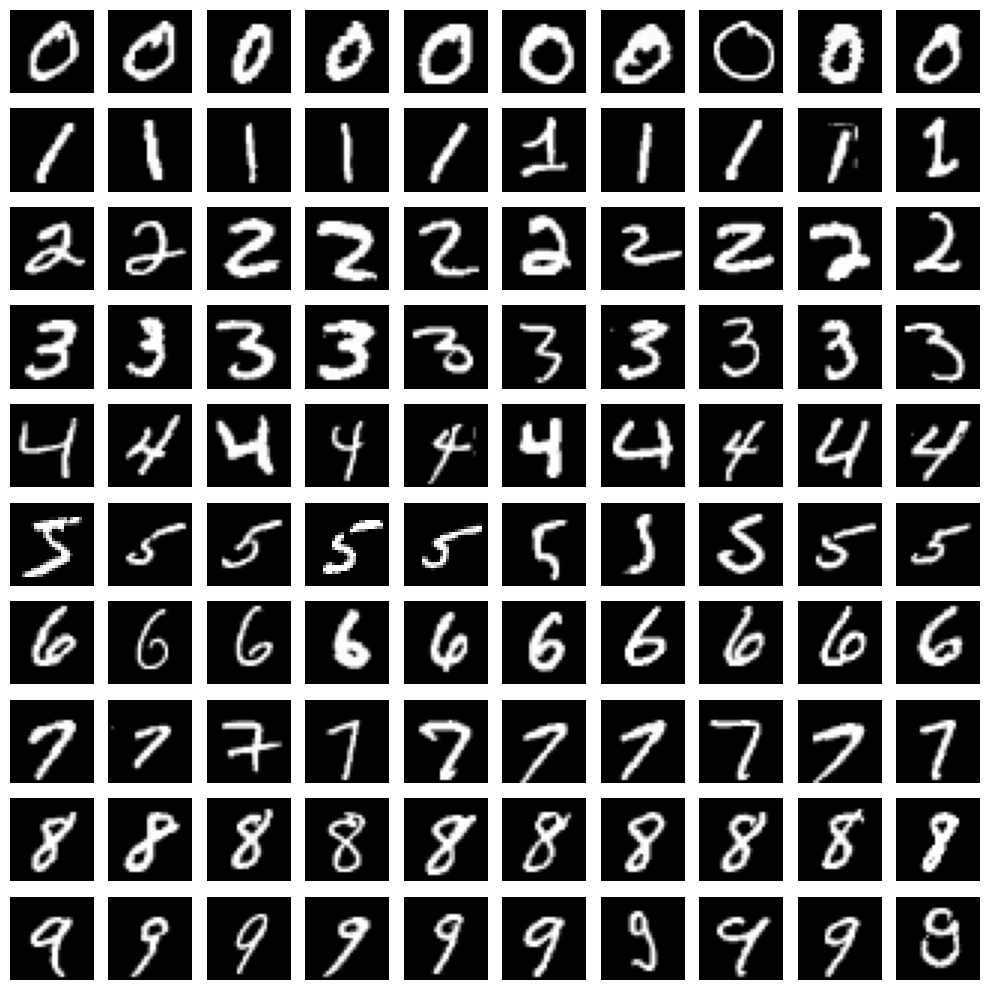

In [62]:
# Collect 10 examples per digit
examples = {i: [] for i in range(10)}

for img, label in train_dataset:
    if len(examples[label]) < 10:
        # unnormalize for visualization
        img_vis = img * 0.3081 + 0.1307
        examples[label].append(img_vis.squeeze())
    if all(len(examples[d]) == 10 for d in range(10)):
        break

# Plot
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for digit in range(10):
    for i in range(10):
        axes[digit, i].imshow(examples[digit][i], cmap='gray')
        axes[digit, i].axis('off')
        if i == 0:
            axes[digit, i].set_ylabel(str(digit), fontsize=12)

plt.tight_layout()
plt.show()